In [3]:
pip install yfinance


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/db/fc/10b7d339ccf6725e13408d76fb1e944f512590a949af426503c38d4af712/yfinance-0.2.41-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 1.9 MB/s eta 0:00:02
      --------------------------------------- 0.1/3.0 MB 812.7 kB/s eta 0:00:04
     -- ------------------------------------- 0.2/3.0 MB 1.2 MB/s eta 0:00:03
     -- ------------------------------------- 0.2/3.0 M

In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

In [9]:
# Get the data for Arvind Fashions
ticker = "ARVINDFASN.NS"  

# Download the data
data = yf.download(ticker, start="2019-01-01", end="2024-07-21")

[*********************100%%**********************]  1 of 1 completed


In [10]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-08,439.063080,460.980927,439.063080,460.980927,459.548645,33388
2019-03-11,484.013275,484.013275,484.013275,484.013275,482.509430,12681
2019-03-12,508.197205,508.197205,508.197205,508.197205,506.618225,8760
2019-03-13,533.607056,533.607056,533.607056,533.607056,531.949158,1166129
2019-03-14,560.280029,560.280029,560.280029,560.280029,558.539246,6931


In [11]:
# Select the Target Varibale Adj Close
df = data[['Adj Close']]

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Adj Close    0
dtype: int64


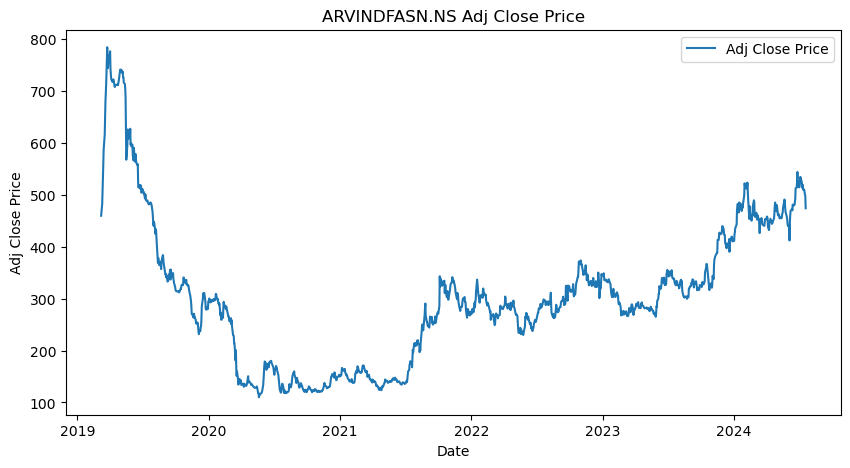

In [12]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df, label='Adj Close Price')
plt.title('ARVINDFASN.NS Adj Close Price')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
df.columns

Index(['Adj Close'], dtype='object')

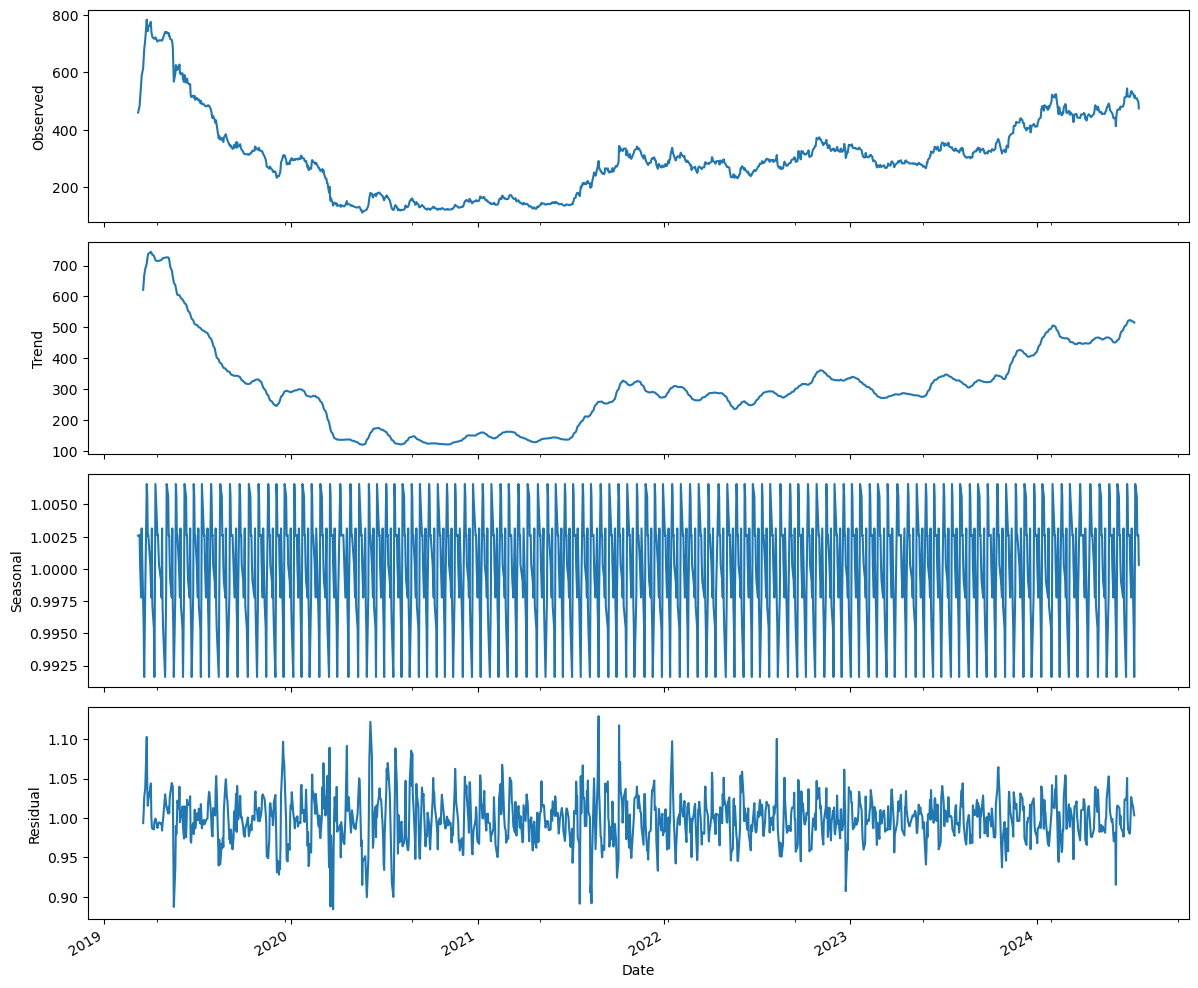

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Adj Close'], model='multiplicative', period=12)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [16]:
# Split the data into training and test sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

# 1. Univariate Forecasting - Conventional Models/Statistical Models

## 1.1. Holt Winters Model

In [17]:
monthly_data = df.resample("M").mean()

In [18]:
# Split the data into training and test sets
train_data, test_data = train_test_split(monthly_data, test_size=0.2, shuffle=False)

In [19]:
len(monthly_data), len(train_data)

(65, 52)

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters model
holt_winters_model = ExponentialSmoothing(train_data, seasonal='mul', seasonal_periods=12).fit()

# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(12)

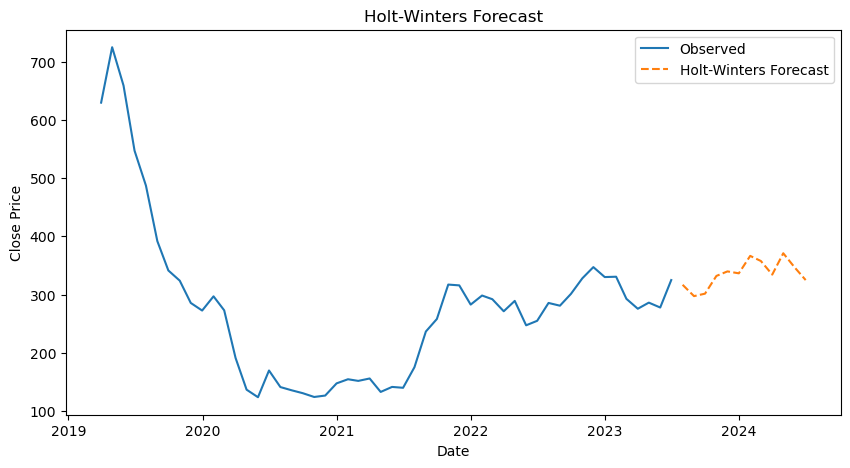

In [21]:
# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Observed')
plt.plot(holt_winters_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [26]:
# Forecast for the next year (12 months)
y_pred = holt_winters_model.forecast(13)

In [27]:
len(test_data), len(y_pred)

(13, 13)

In [28]:
y_pred, test_data

(2023-07-31    316.727549
 2023-08-31    297.260840
 2023-09-30    301.482310
 2023-10-31    331.979423
 2023-11-30    339.750346
 2023-12-31    336.444366
 2024-01-31    366.420949
 2024-02-29    357.620458
 2024-03-31    334.273319
 2024-04-30    370.946194
 2024-05-31    346.602973
 2024-06-30    324.847002
 2024-07-31    316.727549
 Freq: M, dtype: float64,
              Adj Close
 Date                  
 2023-07-31  339.482419
 2023-08-31  314.673803
 2023-09-30  325.579999
 2023-10-31  336.857498
 2023-11-30  390.239999
 2023-12-31  412.082500
 2024-01-31  464.614285
 2024-02-29  482.283334
 2024-03-31  449.497221
 2024-04-30  456.664996
 2024-05-31  461.649997
 2024-06-30  483.715787
 2024-07-31  513.778571)

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, y_pred))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, y_pred)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - y_pred) / test_data)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, y_pred)
print(f'R-squared: {r2}')

RMSE: 101.07387249839353
MAE: 83.84901001757362
MAPE: nan
R-squared: -1.3315195685154206


In [30]:
# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(len(test_data)+12)

In [31]:
holt_winters_forecast

2023-07-31    316.727549
2023-08-31    297.260840
2023-09-30    301.482310
2023-10-31    331.979423
2023-11-30    339.750346
2023-12-31    336.444366
2024-01-31    366.420949
2024-02-29    357.620458
2024-03-31    334.273319
2024-04-30    370.946194
2024-05-31    346.602973
2024-06-30    324.847002
2024-07-31    316.727549
2024-08-31    297.260840
2024-09-30    301.482310
2024-10-31    331.979423
2024-11-30    339.750346
2024-12-31    336.444366
2025-01-31    366.420949
2025-02-28    357.620458
2025-03-31    334.273319
2025-04-30    370.946194
2025-05-31    346.602973
2025-06-30    324.847002
2025-07-31    316.727549
Freq: M, dtype: float64

# 1.2 ARIMA Montly Data

In [32]:
monthly_data.columns

Index(['Adj Close'], dtype='object')

In [34]:
pip install pmdarima

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.



  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/18/ec/f47a721071d084d6c2b6783eb8d058b964b1450cb708d920d0d792f42001/Cython-3.0.10-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   - ------------------------------------- 20.5/614.7 kB 330.3 kB/s eta 0:00:02
   - ------------------------------------- 30.7/614.7 kB 330.3 kB/s eta 0:00:02
   --- ----------------------------------- 61.4/614.7 kB 409.6 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/614.7 kB 595.3 kB/s eta 0:00:01
   ------------ ------------------------- 194.6/614.7 kB 841.6 kB/s eta 0:00:01
   -------------------- ------------------- 317.4/614.7 kB 1.2 MB/s eta 0:00:01
   --

In [36]:
from pmdarima import auto_arima

In [37]:
# Fit auto_arima model
arima_model = auto_arima(train_data['Adj Close'], 
                         seasonal=True, 
                         m=12,  # Monthly seasonality
                         stepwise=True, 
                         suppress_warnings=True)

# Print the model summary
print(arima_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   52
Model:             SARIMAX(2, 0, 0)x(0, 0, [1], 12)   Log Likelihood                -258.952
Date:                              Sun, 21 Jul 2024   AIC                            527.904
Time:                                      19:07:19   BIC                            537.660
Sample:                                  03-31-2019   HQIC                           531.644
                                       - 06-30-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.0835     12.785      1.571      0.116      -4.974      45.141
ar.L1          1.44

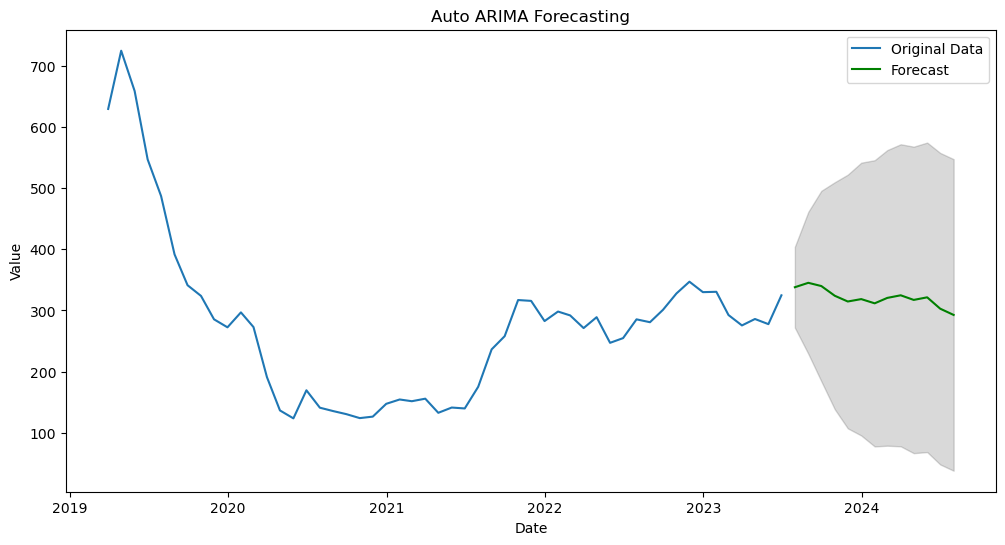

In [41]:
# Number of periods to forecast
n_periods = 13

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data['Adj Close'], label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast', color='green')
plt.fill_between(forecast.index, 
                 conf_int[:, 0], 
                 conf_int[:, 1], 
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

In [42]:
len(forecast)

13

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, forecast)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - forecast) / forecast)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, forecast)
print(f'R-squared: {r2}')

RMSE: 124.458957362301
MAE: 103.7380982542552
MAPE: nan
R-squared: -2.5351966005358784


## 1.3 ARIMA Daily Data

In [44]:
daily_data= df.copy()

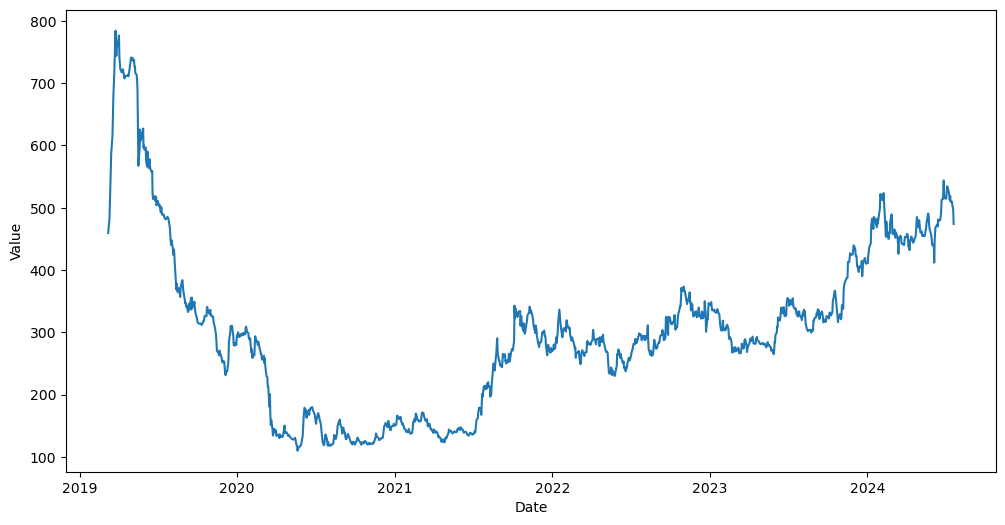

In [45]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [46]:
# Fit auto_arima model
arima_model = auto_arima(daily_data['Adj Close'], 
                         seasonal=True, 
                         m=7,  # Weekly seasonality
                         stepwise=True, 
                         suppress_warnings=True)

In [47]:
# Print the model summary
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1323
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -4797.455
Date:                Sun, 21 Jul 2024   AIC                           9600.910
Time:                        19:10:46   BIC                           9616.470
Sample:                             0   HQIC                          9606.743
                               - 1323                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8244      0.044     18.807      0.000       0.739       0.910
ma.L1         -0.7390      0.053    -13.912      0.000      -0.843      -0.635
sigma2        83.0933      1.518     54.748      0.0

In [48]:
# Generate in-sample predictions
fitted_values = arima_model.predict_in_sample()

In [49]:
fitted_values

Date
2019-03-08      0.000000
2019-03-11    459.552623
2019-03-12    484.851249
2019-03-13    510.601337
2019-03-14    537.159190
                 ...    
2024-07-12    518.864093
2024-07-15    508.533904
2024-07-16    509.152847
2024-07-18    503.351973
2024-07-19    495.838697
Name: predicted_mean, Length: 1323, dtype: float64

In [50]:
# Number of periods to forecast
n_periods = 60  # For example, forecast the next 30 days

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

C:\Users\Ferah Shan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Ferah Shan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [51]:
len(forecast)

60

In [54]:
# Create future dates index
last_date = daily_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods)

# Convert forecast to a DataFrame with future_dates as the index
forecast_df = pd.DataFrame(forecast.values, index=future_dates, columns=['forecast'])
conf_int_df = pd.DataFrame(conf_int, index=future_dates, columns=['lower_bound', 'upper_bound'])

In [55]:
len(future_dates)

60

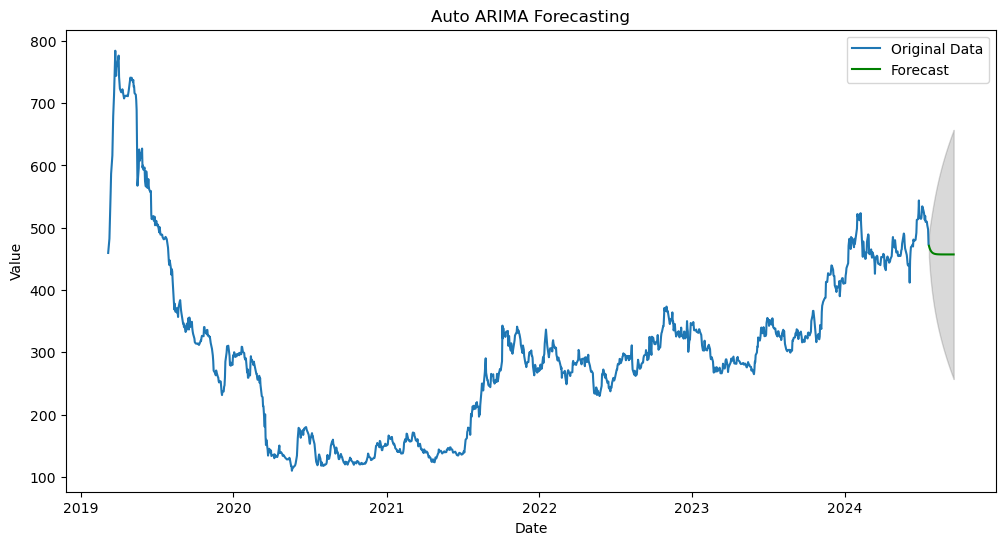

In [56]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'], label='Original Data')
plt.plot(forecast_df, label='Forecast', color='green')
plt.fill_between(future_dates, 
                 conf_int_df['lower_bound'], 
                 conf_int_df['upper_bound'], 
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

# 2. Multivariate Forecasting - Machine Learning Models

In [57]:
pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/b6/62345568cd07de5d9254fcf64d7e44aacbb6abde11ea953b3cb320e58d19/tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.17.0 from https://files.pythonhosted.org/packages/66/03/5c447feceb72f5a38ac2aa79d306fa5b5772f982c2b480c1329c7e382900/tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2d

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [59]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-08,439.063080,460.980927,439.063080,460.980927,459.548645,33388
2019-03-11,484.013275,484.013275,484.013275,484.013275,482.509430,12681
2019-03-12,508.197205,508.197205,508.197205,508.197205,506.618225,8760
2019-03-13,533.607056,533.607056,533.607056,533.607056,531.949158,1166129
2019-03-14,560.280029,560.280029,560.280029,560.280029,558.539246,6931


In [60]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select features (excluding 'Adj Close') and target ('Adj Close')
features = data.drop(columns=['Adj Close'])
target = data[['Adj Close']]

# Fit the scaler on features and target
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target)

# Create DataFrame with scaled features and target
scaled_df = pd.DataFrame(scaled_features, columns=features.columns, index=df.index)
scaled_df['Adj Close'] = scaled_target

In [61]:
# Function to create sequences
def create_sequences(scaled_df, target_col, sequence_length):
    sequences = []
    labels = []
    for i in range(len(scaled_df) - sequence_length):
        sequences.append(scaled_df[i:i + sequence_length])
        labels.append(scaled_df[i + sequence_length, target_col])  # Target column index
    return np.array(sequences), np.array(labels)

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index and sequence length
target_col = scaled_df.columns.get_loc('Adj Close')
sequence_length = 30

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1293, 30, 6)
Shape of y: (1293,)


## 2.1. Neural Networks - Long Short-term Memory (LTSM)

In [62]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

C:\Users\Ferah Shan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 50)              │          11,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.1004 - val_loss: 0.0047
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0048 - val_loss: 0.0028
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0038 - val_loss: 0.0010
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0043 - val_loss: 0.0010
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0034 - val_loss: 0.0012
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0040 - val_loss: 0.0011
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0044 - val_loss: 0.0012
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0046 - val_loss: 0.0010
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0043 - val_loss: 0.0011
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0038 - val_loss: 0.0010
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0038 - val_loss: 8.5354e-04
Epoch 12/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss:

In [65]:
# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values to get them back to the original scale
y_test_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 5)), y_test.reshape(-1, 1)), axis=1))[:, 5]
y_pred_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 5)), y_pred), axis=1))[:, 5]

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


In [66]:
# Print some predictions and true values
print("Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_scaled[i]}, True Value: {y_test_scaled[i]}")

Predictions vs True Values:
Prediction: 347.959734499239, True Value: 347.2178039550781
Prediction: 347.7294859127465, True Value: 355.29266357421875
Prediction: 349.6144114976583, True Value: 351.105712890625
Prediction: 352.00305230685314, True Value: 342.63214111328125
Prediction: 353.7085587141178, True Value: 347.6166076660157
Prediction: 355.1412612139325, True Value: 351.9032287597656
Prediction: 356.33307127633094, True Value: 348.6134948730469
Prediction: 357.5441607668177, True Value: 344.5760498046875
Prediction: 358.82421437819545, True Value: 347.1181640625
Prediction: 359.8797831487696, True Value: 354.6446838378907


In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_pred_scaled)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f'R-squared: {r2}')

RMSE: 18.5466594740428
MAE: 14.832559389098522
MAPE: 3.592634644318947
R-squared: 0.9270166052847776


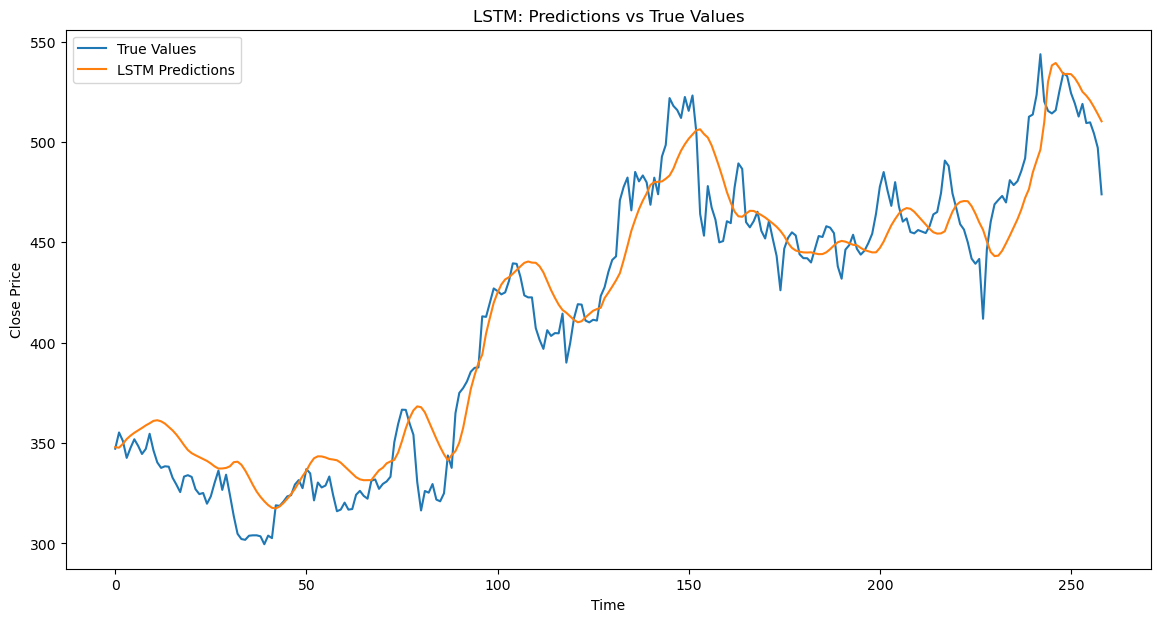

In [68]:
# Plot the predictions vs true values
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled, label='True Values')
plt.plot(y_pred_scaled, label='LSTM Predictions')
plt.title('LSTM: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## 2.2. Tree Based Models

In [69]:
from sklearn.ensemble import RandomForestRegressor #ensemble model
from sklearn.tree import DecisionTreeRegressor #simple algo
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [70]:
import numpy as np

def create_sequences(data, target_col, sequence_length):
    """
    Create sequences of features and labels for time series data.
    
    Parameters:
    - data (np.ndarray): The input data where the last column is the target.
    - target_col (int): The index of the target column in the data.
    - sequence_length (int): The length of each sequence.

    Returns:
    - np.ndarray: 3D array of sequences (samples, sequence_length, num_features)
    - np.ndarray: 1D array of target values
    """
    num_samples = len(data) - sequence_length
    num_features = data.shape[1]
    
    sequences = np.zeros((num_samples, sequence_length, num_features))
    labels = np.zeros(num_samples)

    for i in range(num_samples):
        sequences[i] = data[i:i + sequence_length]
        labels[i] = data[i + sequence_length, target_col]  # Target is specified column

    return sequences, labels

# Example usage
sequence_length = 30

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index
target_col = scaled_df.columns.get_loc('Adj Close')

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

# Flatten X for Decision Tree
num_samples, seq_length, num_features = X.shape
X_flattened = X.reshape(num_samples, seq_length * num_features)

In [71]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

In [72]:
# Train Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'MSE (Decision Tree): {mse_dt}')

MSE (Decision Tree): 0.00020545717311075377


In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_dt)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_dt)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_dt)
print(f'R-squared: {r2}')

RMSE: 0.014333777349699338
MAE: 0.010835470833212808
MAPE: inf
R-squared: 0.9936032531529979


C:\Users\Ferah Shan\AppData\Local\Temp\ipykernel_22804\1497539800.py:12: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_dt)) * 100


In [74]:
# Train and evaluate the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")

Random Forest Mean Squared Error: 0.00014366675688987145


In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_rf)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_rf)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_rf)
print(f'R-squared: {r2}')

RMSE: 0.011986106827901688
MAE: 0.008431562250773123
MAPE: 453998.104887803
R-squared: 0.9955270489696706


In [76]:
# Print some predictions and true values for both models
print("\nDecision Tree Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_dt[i]}, True Value: {y_test[i]}")


Decision Tree Predictions vs True Values:
Prediction: 0.016466448488643287, True Value: 0.021377503268786957
Prediction: 0.026866334527463592, True Value: 0.03435451333076117
Prediction: 0.23059248106653246, True Value: 0.23406901258801405
Prediction: 0.04574562704428678, True Value: 0.04087725562603506
Prediction: 0.07554348203892058, True Value: 0.08948216975582873
Prediction: 0.25263502960787443, True Value: 0.2549280205673572
Prediction: 0.309961660377796, True Value: 0.3094670315411024
Prediction: 0.039162448731564825, True Value: 0.042565003306998195
Prediction: 0.04966595231097798, True Value: 0.04988786050542943
Prediction: 0.06918798606244447, True Value: 0.0592214550262172


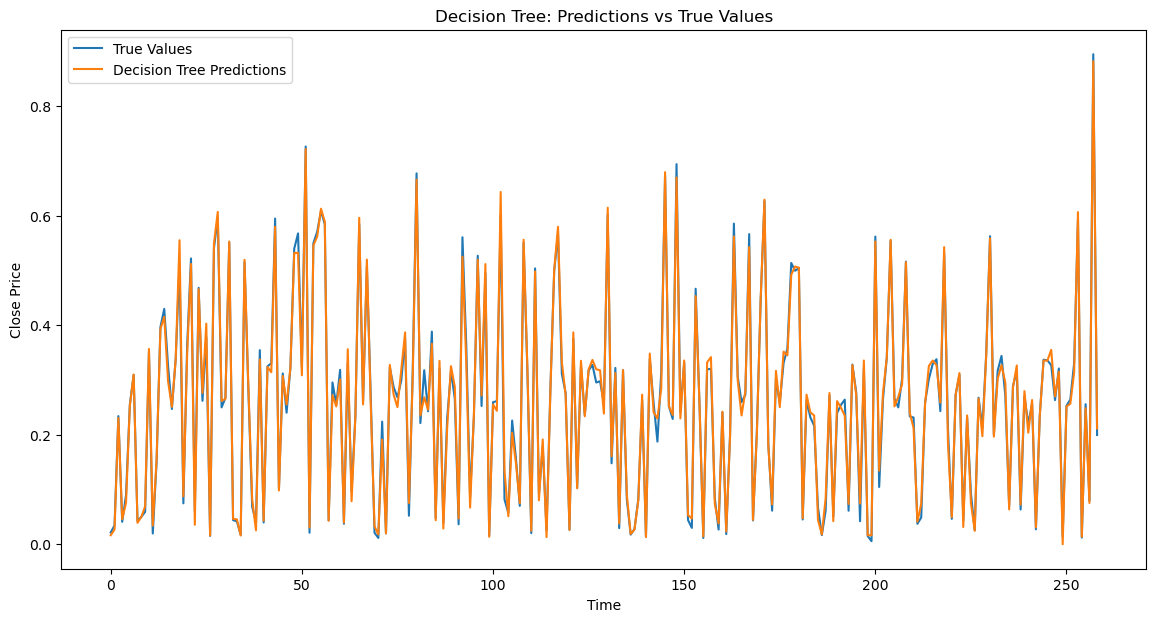

In [77]:
# Plot the predictions vs true values for Decision Tree
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.title('Decision Tree: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [78]:
print("\nRandom Forest Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_rf[i]}, True Value: {y_test[i]}")


Random Forest Predictions vs True Values:
Prediction: 0.017069311462122063, True Value: 0.021377503268786957
Prediction: 0.028225563656437486, True Value: 0.03435451333076117
Prediction: 0.217213543183912, True Value: 0.23406901258801405
Prediction: 0.0468167464241702, True Value: 0.04087725562603506
Prediction: 0.07491887342100717, True Value: 0.08948216975582873
Prediction: 0.2512879254973579, True Value: 0.2549280205673572
Prediction: 0.312386427216252, True Value: 0.3094670315411024
Prediction: 0.041194974947810256, True Value: 0.042565003306998195
Prediction: 0.045976723370173195, True Value: 0.04988786050542943
Prediction: 0.0653516385553894, True Value: 0.0592214550262172


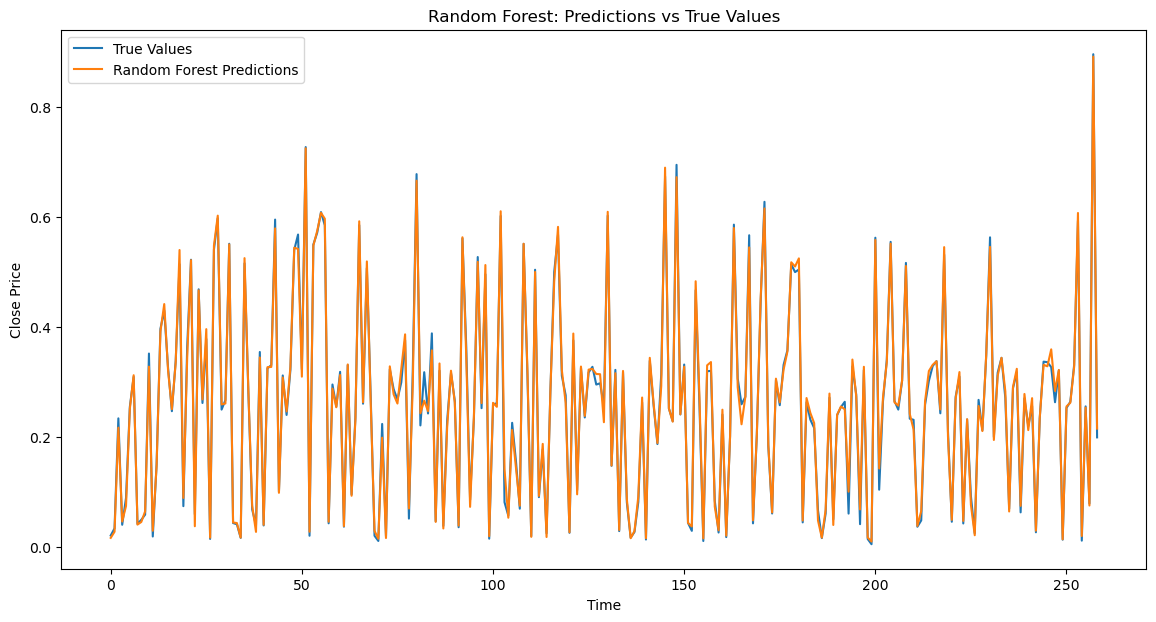

In [79]:
# Plot the predictions vs true values for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

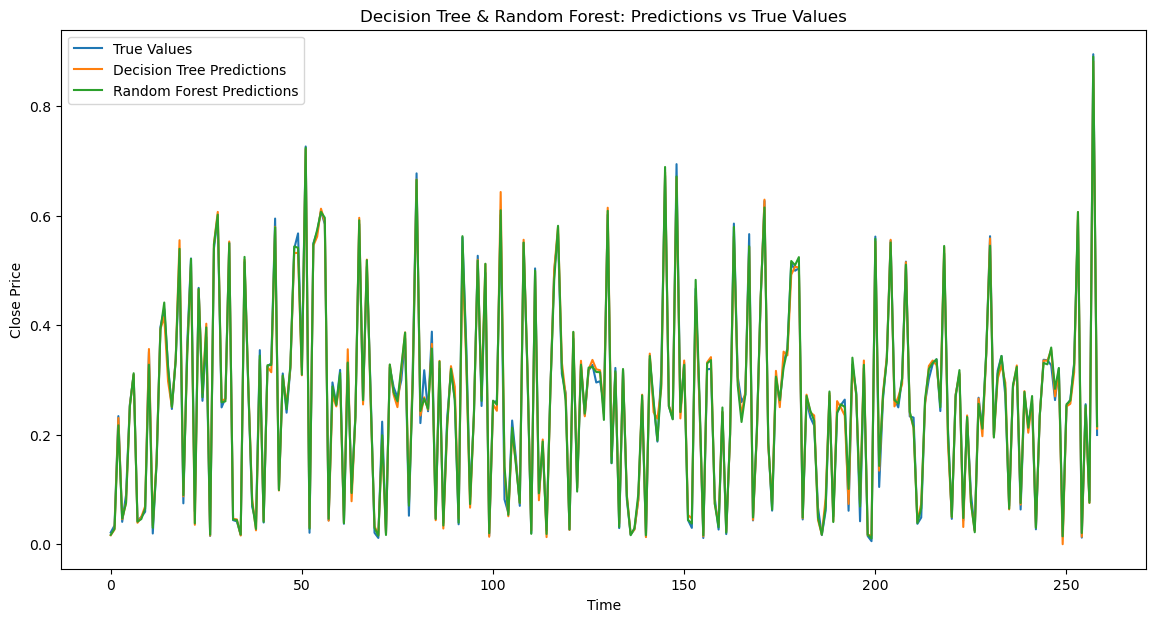

In [80]:
# Plot both Decision Tree and Random Forest predictions together
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Decision Tree & Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()